# Scikit-Learn Workflow and Project Definition

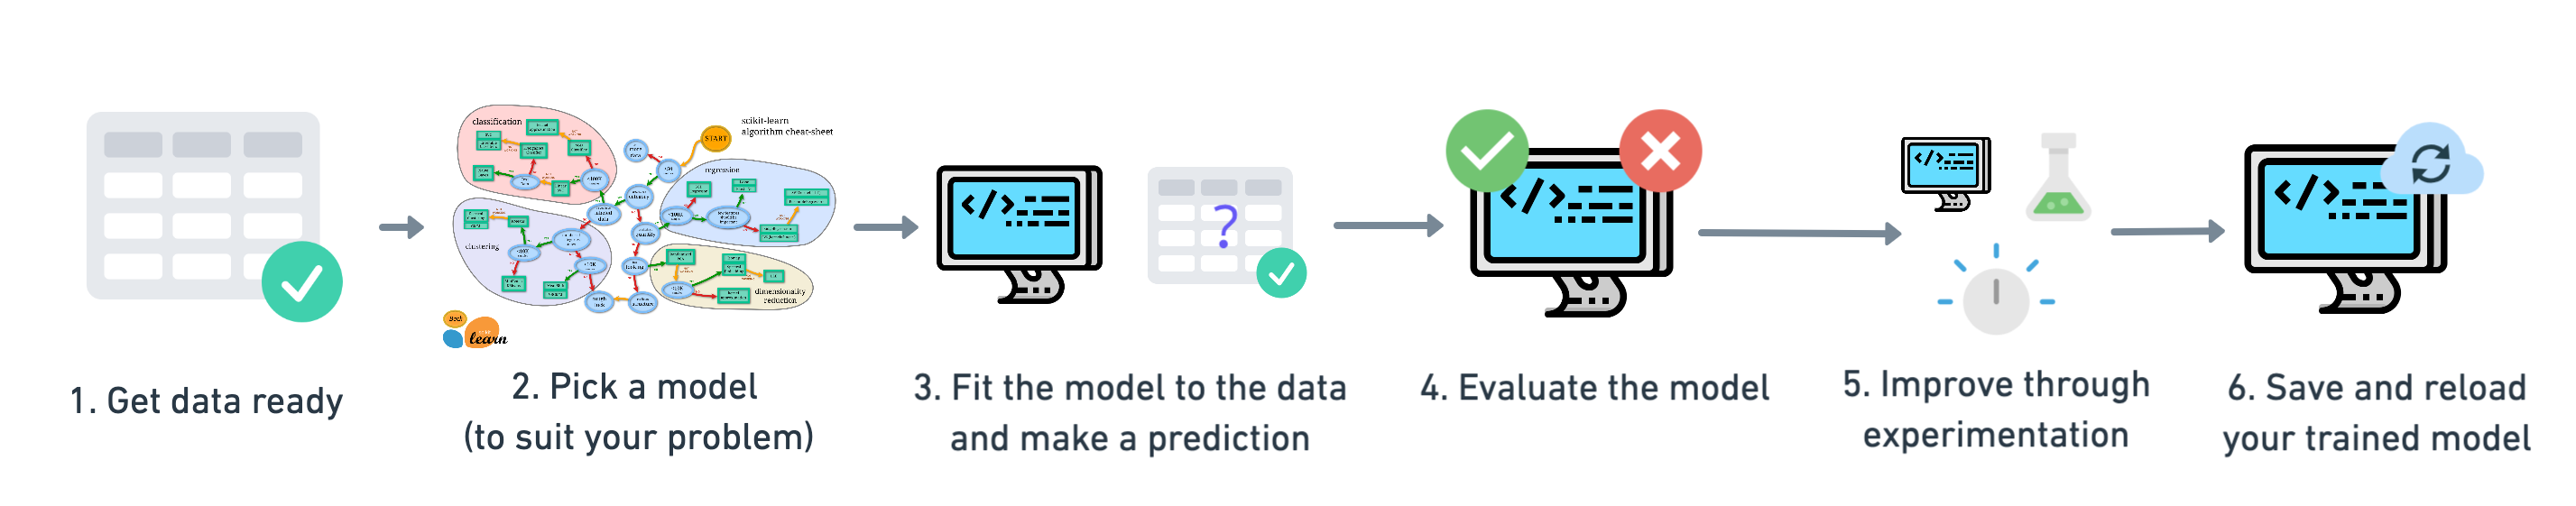

Heart Disease Data Dictionary
The following are the features we'll use to predict our target variable (heart disease or no heart disease).

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
13. thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

#0.preparing the environment

In [ ]:
# %matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# 1.Getting data ready

1. split the data into features and labels
2. filling or imputing the missing values
3. converting strings to numerical values

## loading the data and collecting information

In [ ]:
heart_disease = pd.read_csv('/content/drive/MyDrive/projectDL/heart-disease.csv')
heart_disease.reset_index(drop=True, inplace=True)
print(heart_disease.shape)
heart_disease.head ()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#checking the percentage of each target group
heart_disease["target"].value_counts() / len(heart_disease) * 100

1    54.455446
0    45.544554
Name: target, dtype: float64

In [ ]:
#checking data types
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking missing values
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## visualizing and comparing information

In [ ]:
# Compare target column with sex column
pd.crosstab(heart_disease.target, heart_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


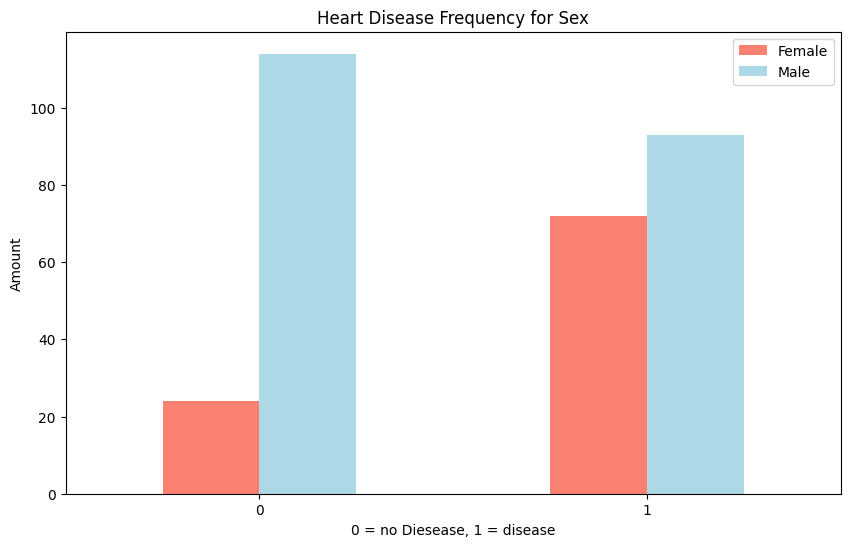

In [ ]:
# Create a plot of crosstab
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = no Diesease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

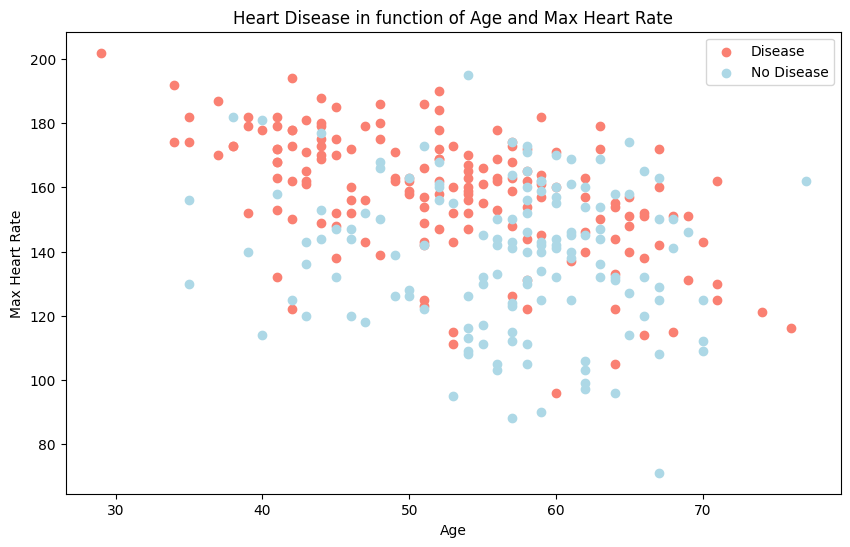

In [ ]:
# Create another figure
plt.figure(figsize=(10,6))

#Scatter with posotive examples
plt.scatter(heart_disease.age[heart_disease.target==1],
           heart_disease.thalach[heart_disease.target==1],
           c="salmon")

#Scatter with posotive examples
plt.scatter(heart_disease.age[heart_disease.target==0],
           heart_disease.thalach[heart_disease.target==0],
           c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

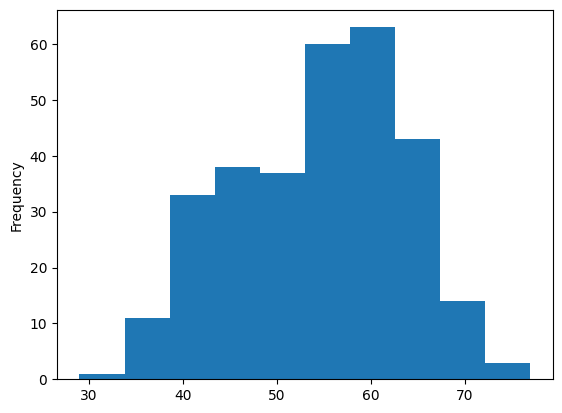

In [ ]:
# check the distribution of age
heart_disease.age.plot.hist();

##Corrolationn matrix

In [ ]:
# Making correlation matrix
heart_disease.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

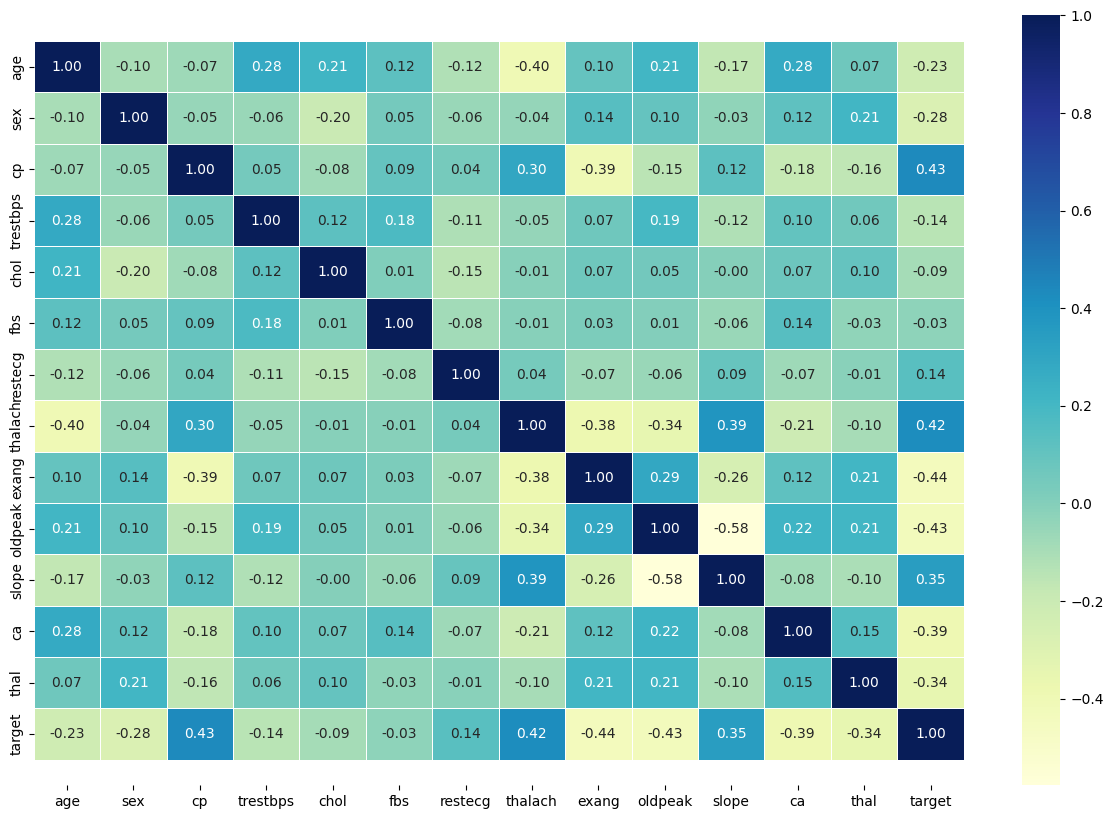

In [ ]:
# visualizing correlation matrix
import seaborn as sns
corr_matrix = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Splitting features and label

In [ ]:
# Split data into features and labels
X = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

In [ ]:
# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

#2.choosing the right algorithm for the problem

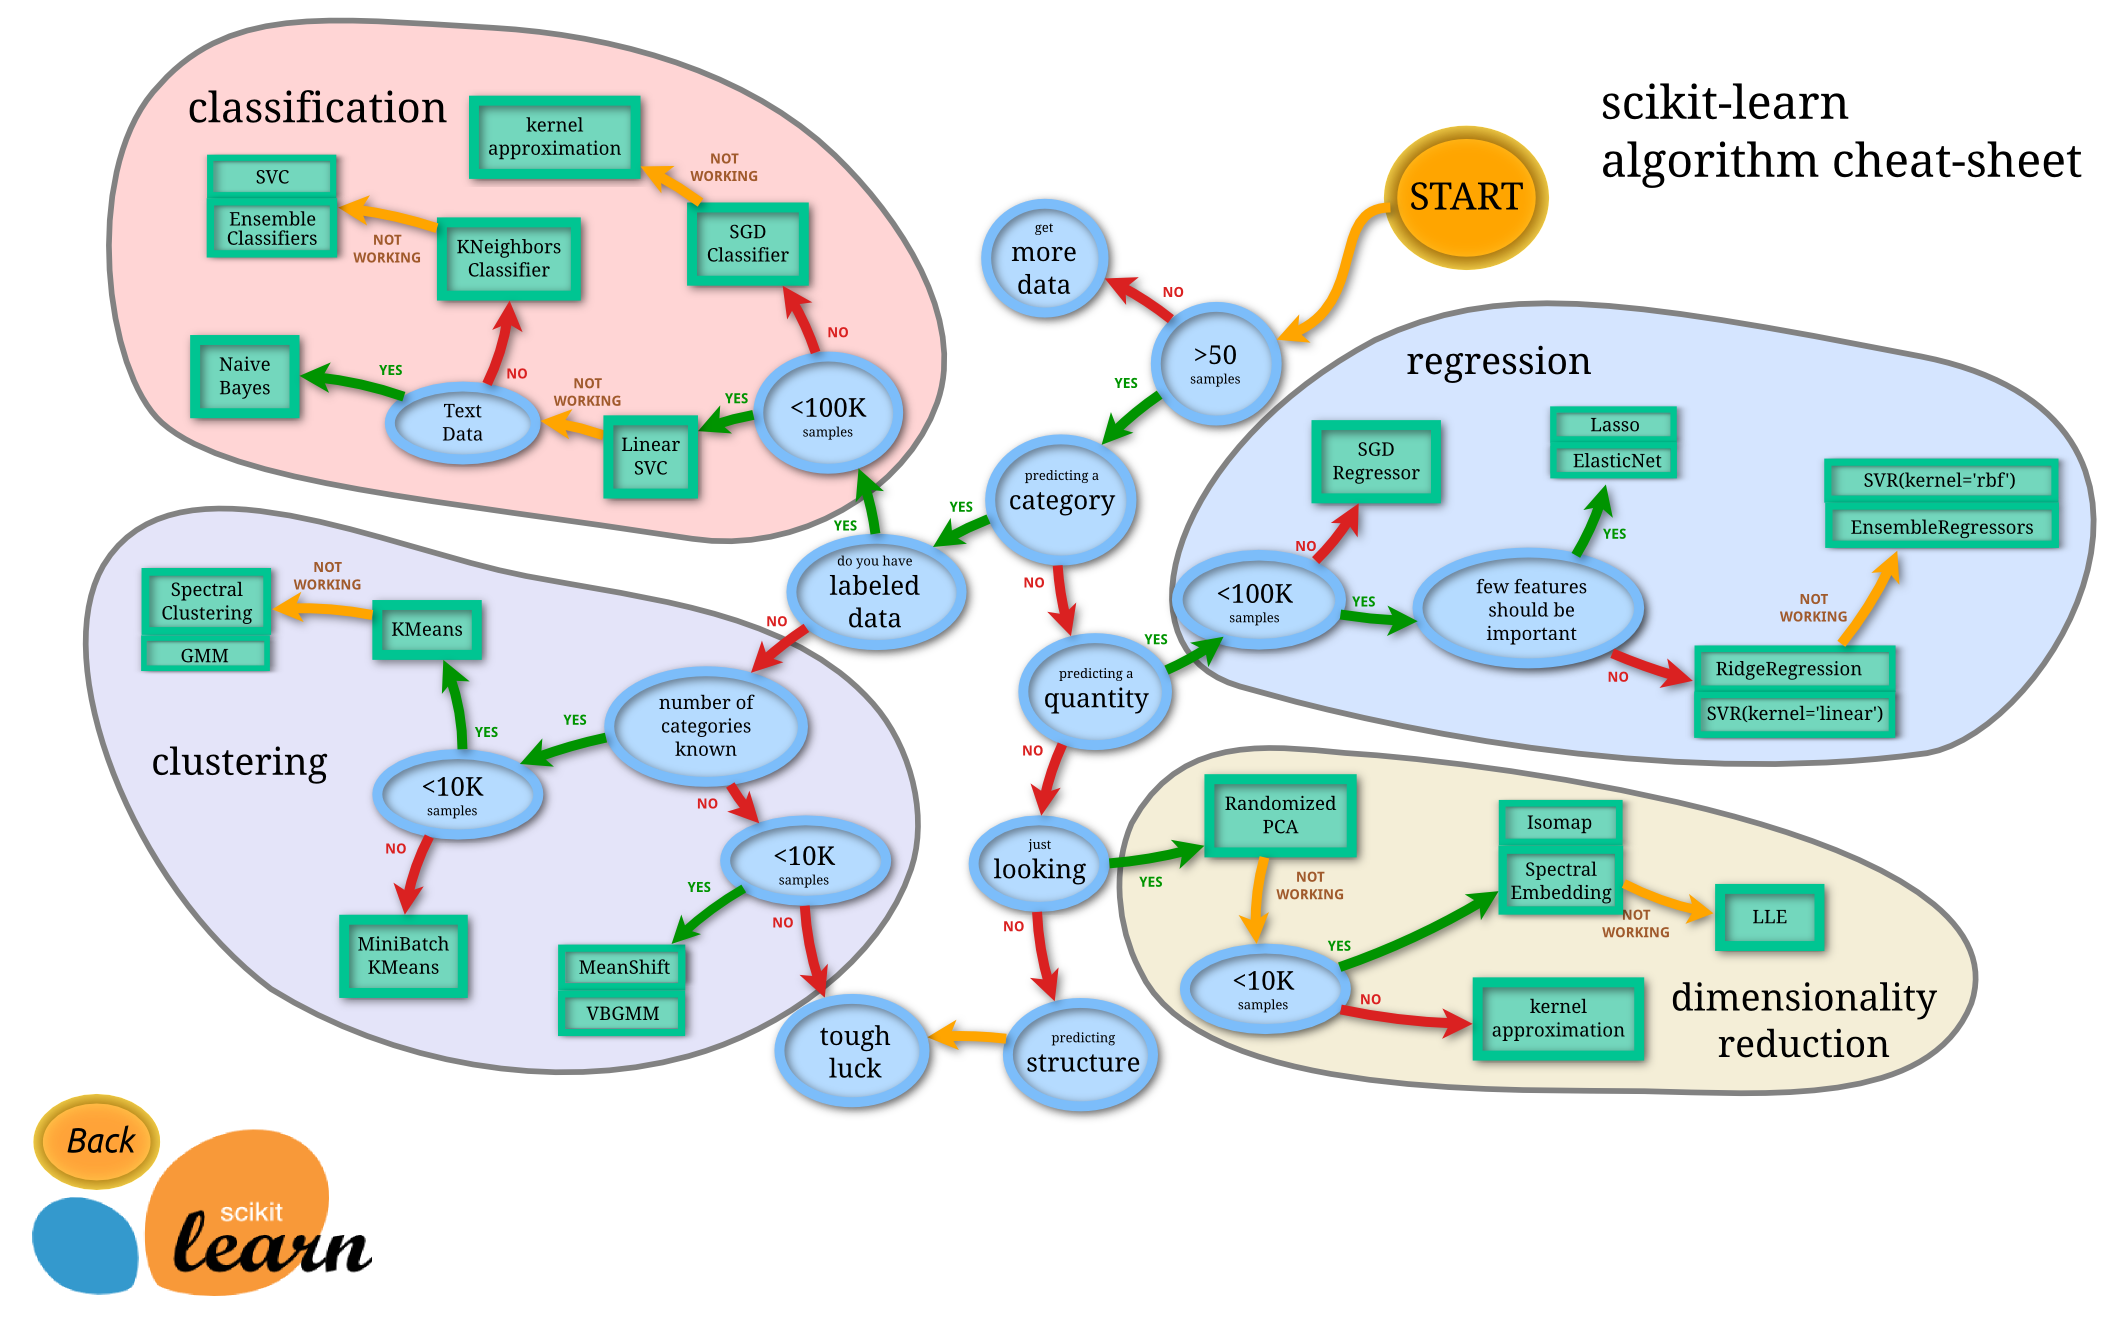

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Creating a function to test 3 algorithms
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=Y_train,
                             y_test=Y_test)

print(model_scores)

{'Logistic Regression': 0.8852459016393442, 'KNN': 0.6885245901639344, 'Random Forest': 0.8360655737704918}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model Comparison

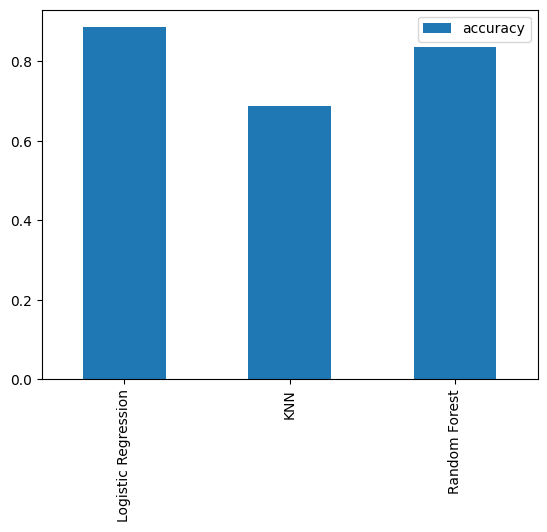

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#3.Creating models with high accuracy score

In [ ]:
#LogisticRegression model
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(max_iter=1000)
LR_model.fit(X_train, Y_train)
print(LR_model.score(X_test, Y_test))

0.8852459016393442


In [ ]:
#RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
RFC_model = RandomForestClassifier(n_estimators = 100)
RFC_model.fit (X_train , Y_train )
RFC_model.score(X_test , Y_test)

0.8524590163934426

#4.Evaluation function and evaluatin of the initial models

In [ ]:
# creating a function to ease the evaluation of model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def evaluation_preds(y_true, y_preds):
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dic = { "accuracy" : round(accuracy, 2) ,
                  "precision" : round(precision, 2),
                  "recall" : round(recall, 2),
                  "f1" : round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")

    return metric_dic

In [ ]:
#finding inial model's score
RFC_model_preds, LR_model_preds = RFC_model.predict(X_test), LR_model.predict(X_test)
RFC_baseline_metrics, LR_baseline_metrics= evaluation_preds(Y_test, RFC_model_preds), evaluation_preds(Y_test, LR_model_preds)

Accuracy: 85.25
Precision: 0.85
Recall: 0.88
F1: 0.86
Accuracy: 88.52
Precision: 0.88
Recall: 0.91
F1: 0.89


#5.Improving the model

##LogisticRegression hyperparameter tuning


The most important parameter in logistic regression is often considered to be the regularization parameter (C), which controls the amount of regularization applied to the model. Here's an explanation of this crucial parameter:

Regularization Parameter (C): The C parameter in logistic regression controls the inverse of the regularization strength. In other words, smaller values of C result in stronger regularization, while larger values of C lead to weaker regularization. Regularization is used to prevent overfitting, where the model fits the training data too closely and may not generalize well to new, unseen data.

* Smaller C: A smaller C value applies stronger regularization, which can help prevent overfitting but might lead to underfitting if set too low. It encourages the model to have simpler coefficients by penalizing large coefficient values.

* Larger C: A larger C value applies weaker regularization, allowing the model to fit the training data more closely. This can be useful when you have high-confidence in your data and want the model to be less constrained.

In [ ]:
# Let's tune KNN
train_scores = []
test_scores = []
# create a list for different values of C
C = np.arange(0.01 , 1 , 0.05)
LR = LogisticRegression(solver='liblinear')
# Set KNN instance
for i in C:
    LR.set_params(C = i, )
    LR.fit(X_train, Y_train)
    train_scores.append(LR.score(X_train, Y_train))
    test_scores.append(LR.score(X_test, Y_test))

Maximum score on the test data: 88.52%


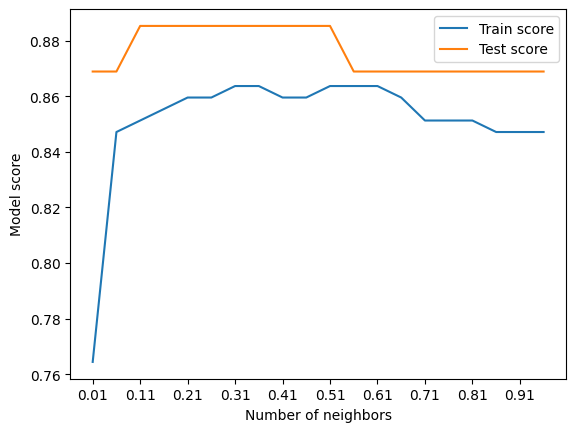

In [ ]:
plt.plot(C, train_scores, label="Train score")
plt.plot(C, test_scores, label="Test score")
plt.xticks(np.arange(0.01 , 1 , 0.1) )
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum score on the test data: {max(test_scores)*100:.2f}%")

In [ ]:
#creating improved LR model
LR_improved_model = LogisticRegression(solver='liblinear', C=0.21)
LR_improved_model.fit(X_train, Y_train)
#improved LogisticRegression scores
LR_model_preds = LR_improved_model.predict(X_test)
LR_improved_metrics=  evaluation_preds(Y_test, LR_model_preds)

Accuracy: 88.52
Precision: 0.88
Recall: 0.91
F1: 0.89


## Using GridSearch for tuning RandomForestClassifier











In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
grid = {"n_estimators" : [300, 400, 500, 600, 700],
        "max_depth" : [ 20, 30, 40],
        "max_features" : [None, "sqrt"],
        "min_samples_split" : [4, 6],
        "min_samples_leaf" : [2, 4, 6]}

heart_model = RandomForestClassifier(n_jobs=-1)
grid_heart_model = GridSearchCV(estimator = heart_model,
                                                param_grid = grid,
                                                cv = 5,
                                                verbose=2)
#n_iter=> number of models to try
#cv = cross validation num
#fitting data to new model
grid_heart_model.fit(X_train, Y_train)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   1.0s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.9s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   0.8s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=300; total time=   1.3s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   1.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=400; total time=   1.1s
[CV] END max_depth=20, max_features=None, min_samples_leaf=2, min_samples_split=4, n_estimators=4

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [20, 30, 40],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 6],
                         'n_estimators': [300, 400, 500, 600, 700]},
             verbose=2)

In [ ]:
grid_heart_model.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 500}

In [ ]:
#creating the improved RFC model
RFC_improved_model = RandomForestClassifier(n_jobs=-1,
                                     max_depth = 20,
                                     max_features = 'sqrt',
                                     min_samples_leaf = 4,
                                     min_samples_split = 6,
                                     n_estimators= 500 )
RFC_improved_model.fit(X_test, Y_test)

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=500, n_jobs=-1)

In [ ]:
#making predictions and analyzing the improved RFC model
RFC_preds = RFC_improved_model.predict(X_test)
RFC_improved_metrics = evaluation_preds(Y_test, RFC_preds)

Accuracy: 91.80
Precision: 0.89
Recall: 0.97
F1: 0.93


# 6.Evaluating improved model

## Visualizing improved model's scores

<Axes: >

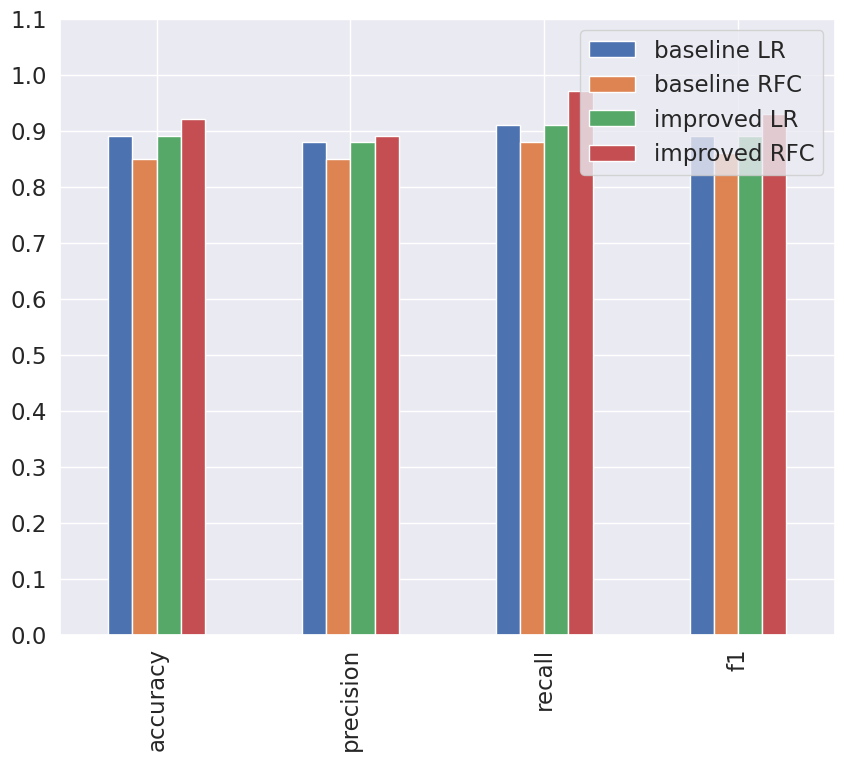

In [ ]:
#plotting the results
compare_metrics = pd.DataFrame({"baseline LR" : LR_baseline_metrics,
                                "baseline RFC" : RFC_baseline_metrics,
                                "improved LR" : LR_improved_metrics,
                                "improved RFC" : RFC_improved_metrics})
compare_metrics.plot.bar(figsize =(10, 8) , yticks = np.arange(0 , 1.2 , 0.1))


## Area under the receiver operating characteristic curve (AUC/ROC)
ROC curves are a comparison of a model's true positive rate (TPR) versus a model's false positive rate(FPR)

* True Positive = model predicts 1 when target is 1
* False Positive = model predicts 1 when target is 0
* True Negative  = model predicts 0 when target is 0
* False Negative = model predicts 0 when target is 1

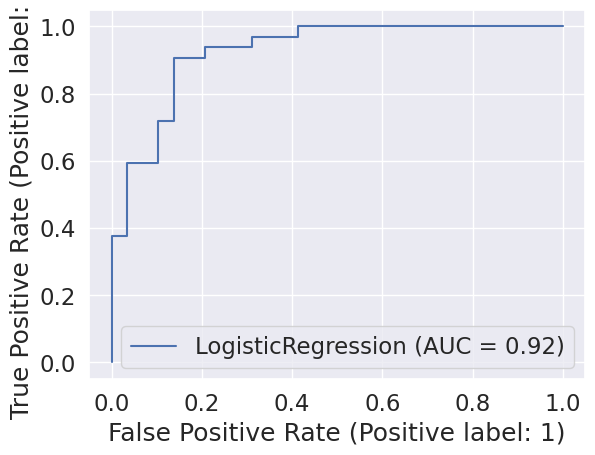

In [ ]:
# Plotting ROC curve and calculate and calculating AUC metric for LR model
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(LR_improved_model, X_test, Y_test)

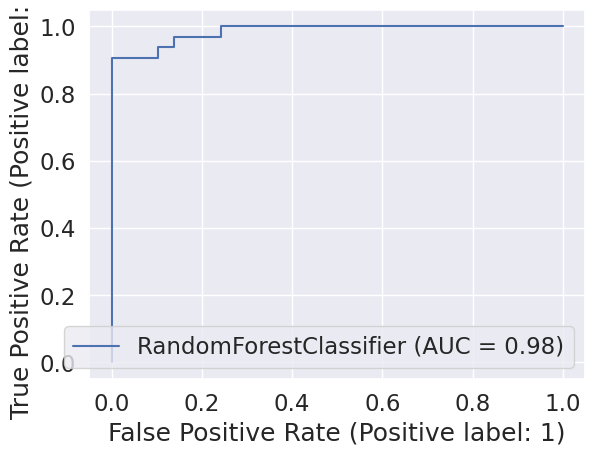

In [ ]:
# Plotting ROC curve and calculate and calculating AUC metric for RFC model
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(RFC_improved_model, X_test, Y_test)

## Confusion matrix of improved models

LR model confusion matrix


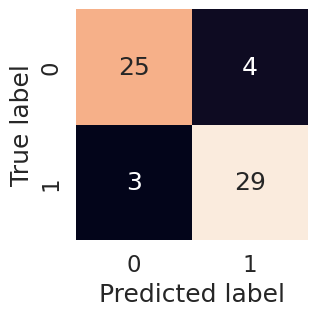

In [ ]:
#Plotting confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis
print("LR model confusion matrix")
plot_conf_mat(Y_test, LR_model_preds)

RFC model confusion matrix


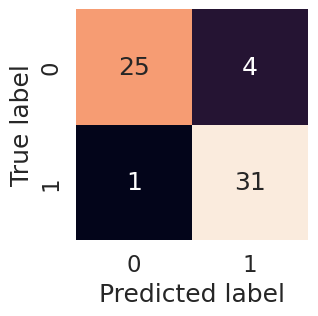

In [ ]:
print("RFC model confusion matrix")
plot_conf_mat(Y_test, RFC_preds)

##Classification report of improved models

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, LR_model_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, RFC_preds))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91        29
           1       0.89      0.97      0.93        32

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.92      0.92      0.92        61



## Cross validation evaluation

In [ ]:
#cross validation evaluation of LR model
from sklearn.model_selection import cross_val_score
cv_acc = np.mean(cross_val_score(LR_improved_model, X, Y, cv=5, scoring="accuracy"))
cv_precision = np.mean(cross_val_score(LR_improved_model, X, Y, cv=5, scoring="precision"))
cv_recall = np.mean(cross_val_score(LR_improved_model, X, Y, cv=5, scoring="recall"))
cv_f1 = np.mean(cross_val_score(LR_improved_model, X, Y, cv=5, scoring="f1"))
print(f" accuracy : {cv_acc}\n precission : {cv_precision}\n recall : {cv_recall}\n f1 : {cv_f1}  ")
CV_LR_dic = {
  "accuracy" : cv_acc * 100,
  "precission" : cv_precision * 100,
  "recall" : cv_recall * 100,
  "f1" : cv_f1 * 100
}

 accuracy : 0.8479781420765027
 precission : 0.8215873015873015
 recall : 0.9272727272727274
 f1 : 0.8705403543192143  


In [ ]:
#cross validation evaluation of RFC model
from sklearn.model_selection import cross_val_score
cv_acc = np.mean(cross_val_score(RFC_improved_model, X, Y, cv=5, scoring="accuracy"))
cv_precision = np.mean(cross_val_score(RFC_improved_model, X, Y, cv=5, scoring="precision"))
cv_recall = np.mean(cross_val_score(RFC_improved_model, X, Y, cv=5, scoring="recall"))
cv_f1 = np.mean(cross_val_score(RFC_improved_model, X, Y, cv=5, scoring="f1"))
print(f" accuracy : {cv_acc}\n precission : {cv_precision}\n recall : {cv_recall}\n f1 : {cv_f1}  ")
CV_RFC_dic = {
  "accuracy" : cv_acc * 100,
  "precission" : cv_precision * 100,
  "recall" : cv_recall * 100,
  "f1" : cv_f1 * 100
}

 accuracy : 0.8381420765027323
 precission : 0.8397744360902257
 recall : 0.8666666666666666
 f1 : 0.8544188951837588  


<Axes: >

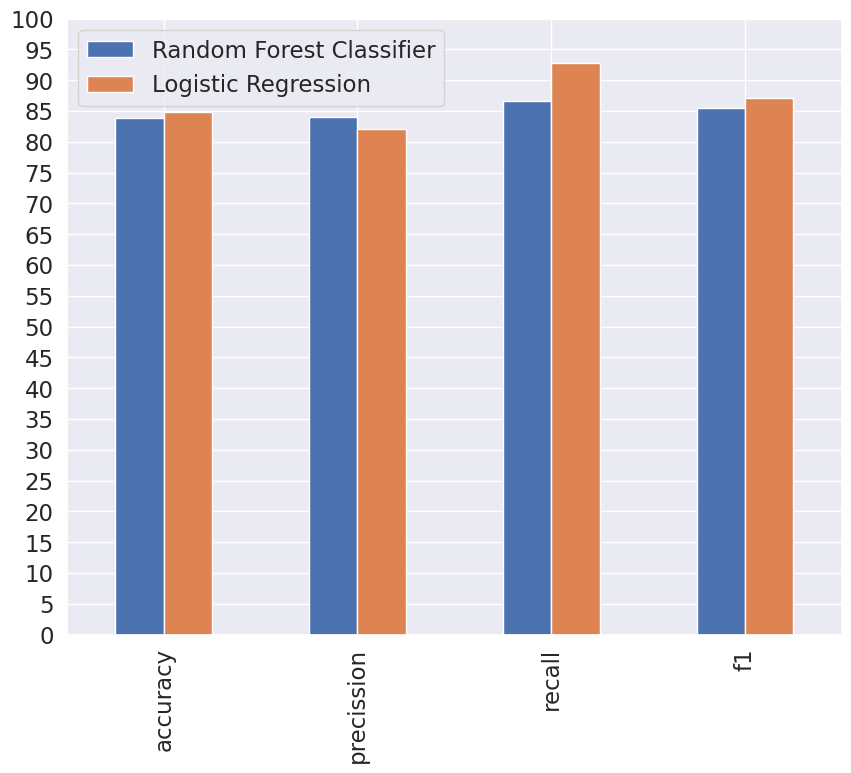

In [ ]:
#plotting the cross validation scores
compare_metrics = pd.DataFrame({"Random Forest Classifier" : CV_RFC_dic,
                                "Logistic Regression" : CV_LR_dic})
compare_metrics.plot.bar(figsize =(10, 8) , yticks = np.arange(0 , 105 , 5))


#7.Feature importance

In [ ]:
# Finding the coefficient of each feature
features_dic = dict(zip(X.columns, list(LR_improved_model.coef_[0])))
features_dic

{'age': 0.0032808390036779367,
 'sex': -0.8699051066720516,
 'cp': 0.6636283231322131,
 'trestbps': -0.011575748422767661,
 'chol': -0.0016727591348942204,
 'fbs': 0.04487452035830379,
 'restecg': 0.3168612761345645,
 'thalach': 0.02462483655103133,
 'exang': -0.6099092550985784,
 'oldpeak': -0.5700962477290644,
 'slope': 0.4547473484145312,
 'ca': -0.6391736585665632,
 'thal': -0.6809864504962165}

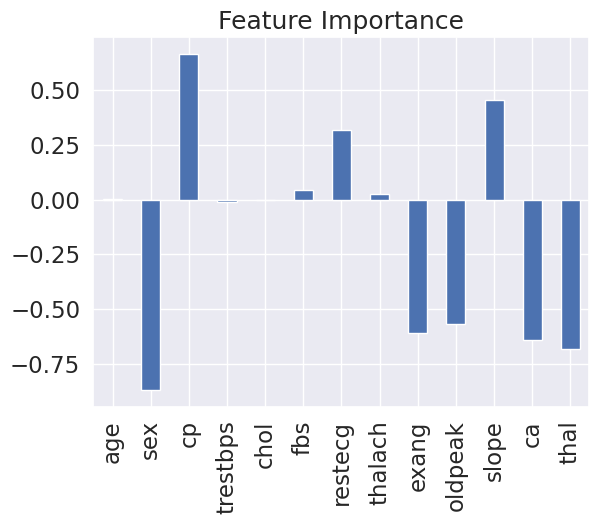

In [ ]:
# Visualize feature importance
features_df = pd.DataFrame(features_dic, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

#8.Saving the improved models

In [ ]:
from joblib import dump, load
#saving a model
dump(RFC_improved_model, "/content/drive/MyDrive/projectDL/RFC_improved_model.joblib")
dump(LR_improved_model, "/content/drive/MyDrive/projectDL/LR_improved_model.joblib")

['/content/drive/MyDrive/projectDL/LR_improved_model.joblib']